In [1]:

import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for betweenness centrality (using inverse of flow)
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['weight']

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='inv_weight')
max_betweenness = max(weighted_betweenness_centrality.values())
normalized_weighted_betweenness_centrality = {node: value / max_betweenness for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Betweenness Centrality: [('Stratford', 1.0), ('Bank and Monument', 0.8197926648662776), ('Liverpool Street', 0.7091210035717397), ('Waterloo', 0.6870110636815053), ("King's Cross St. Pancras", 0.47251502744141477), ('Victoria', 0.3807300287481488), ('Hammersmith', 0.3615820193396638), ('Paddington', 0.3471208293405349), ('Highbury & Islington', 0.2872201411272759), ('Canada Water', 0.2723930655980486)]


In [2]:

import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')  # 请确保文件路径正确

# 2. 构建加权图
G = nx.DiGraph()
for _, row in flows_data.iterrows():
    G.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for closeness centrality
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['weight']

# 3. Recompute the weighted closeness centrality
weighted_closeness_centrality = nx.closeness_centrality(G, distance='inv_weight')

# 4. Normalize the closeness centrality
max_closeness = max(weighted_closeness_centrality.values())
normalized_weighted_closeness_centrality = {node: value / max_closeness for node, value in weighted_closeness_centrality.items()}

# 5. Sort and get the top 10 nodes
top_10_weighted_closeness = sorted(normalized_weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Closeness Centrality:", top_10_weighted_closeness)


Top 10 nodes by Normalized Weighted Closeness Centrality: [('Bank and Monument', 1.0), ('Liverpool Street', 0.9966541910421303), ('Canary Wharf', 0.9919831044979475), ('Farringdon', 0.9863152272152099), ('Oxford Circus', 0.966437289920816), ("King's Cross St. Pancras", 0.9475906559047189), ('Holborn', 0.9426240699248346), ('Waterloo', 0.936469142327811), ('Paddington', 0.9245594097112507), ('Chancery Lane', 0.9215613434084409)]


In [3]:
import pandas as pd
import networkx as nx

# 1. 加载数据
flows_data = pd.read_csv('london_flows.csv')

# 2. 构建加权图
G = nx.from_pandas_edgelist(flows_data, 'station_origin', 'station_destination', ['flows'], create_using=nx.DiGraph())

# Removing edges with zero flow
edges_to_remove = [(u, v) for u, v, data in G.edges(data=True) if data['flows'] == 0]
G.remove_edges_from(edges_to_remove)

# Adjusting the weights for betweenness centrality (using inverse of flow)
for _, _, data in G.edges(data=True):
    data['inv_weight'] = 1 / data['flows']

# 5. 计算加权介数中心性并归一化
weighted_betweenness_centrality = nx.betweenness_centrality(G, weight='inv_weight')
max_betweenness = max(weighted_betweenness_centrality.values())
normalized_weighted_betweenness_centrality = {node: value / max_betweenness for node, value in weighted_betweenness_centrality.items()}
top_10_weighted_betweenness = sorted(normalized_weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Normalized Weighted Betweenness Centrality:", top_10_weighted_betweenness)


Top 10 nodes by Normalized Weighted Betweenness Centrality: [('Stratford', 1.0), ('Bank and Monument', 0.8197926648662776), ('Liverpool Street', 0.7091210035717397), ('Waterloo', 0.6870110636815053), ("King's Cross St. Pancras", 0.47251502744141477), ('Victoria', 0.3807300287481488), ('Hammersmith', 0.3615820193396638), ('Paddington', 0.3471208293405349), ('Highbury & Islington', 0.2872201411272759), ('Canada Water', 0.2723930655980486)]


In [16]:
import pandas as pd
import networkx as nx

# Load the data
flows_data = pd.read_csv('london_flows.csv')

# Create a weighted graph from the data
G_weighted = nx.DiGraph()
for _, row in flows_data.iterrows():
    G_weighted.add_edge(row['station_origin'], row['station_destination'], weight=row['flows'])

# Define a function to evaluate the impact of removing nodes
def evaluate_impact(graph, nodes_to_remove):
    G_temp = graph.copy()
    G_temp.remove_nodes_from(nodes_to_remove)
    
    # Measure the impact using average shortest path length (WASPL)
    try:
        avg_shortest_path_length = nx.average_shortest_path_length(G_temp)
    except:
        avg_shortest_path_length = "Not Connected"
    
    # Measure the impact using giant component size
    giant_component_size = len(max(nx.strongly_connected_components(G_temp), key=len)) / graph.number_of_nodes()
    
    return avg_shortest_path_length, giant_component_size

# Evaluate the impact of removing the top 3 nodes based on Betweenness Centrality
nodes_to_remove = ['Stratford', 'Liverpool Street', 'Bank and Monument']
impact_avg_path, impact_giant_component = evaluate_impact(G_weighted, nodes_to_remove)
impact_avg_path, impact_giant_component


(1.7310510164940545, 0.9924812030075187)

In [17]:
# Compute weighted centrality measures for the weighted graph
weighted_degree_centrality = nx.degree_centrality(G_weighted)
weighted_closeness_centrality = nx.closeness_centrality(G_weighted, distance='weight')
weighted_betweenness_centrality = nx.betweenness_centrality(G_weighted, weight='weight', normalized=True)

# Get top 3 nodes for each centrality measure
top_weighted_degree = sorted(weighted_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_weighted_closeness = sorted(weighted_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_weighted_betweenness = sorted(weighted_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

top_weighted_degree, top_weighted_closeness, top_weighted_betweenness


([('Stratford', 1.8417085427135678),
  ('Highbury & Islington', 1.57035175879397),
  ('Whitechapel', 1.5376884422110553)],
 [('Manor Park', 1.722943722943723),
  ('Abbey Road', 1.6652719665271967),
  ('Bank and Monument', 1.6652719665271967)],
 [('West Ham', 2.1008782426871e+62),
  ('Bank and Monument', 1.6913745089111568e+61),
  ('Stratford', 6.486950941082152e+60)])

In [18]:
# Evaluate the impact of removing the top 3 nodes based on Weighted Betweenness Centrality
nodes_to_remove_weighted = ['West Ham', 'Bank and Monument', 'Stratford']
impact_avg_path_weighted, impact_giant_component_weighted = evaluate_impact(G_weighted, nodes_to_remove_weighted)
impact_avg_path_weighted, impact_giant_component_weighted


(1.6579529471934535, 0.9924812030075187)

In [3]:
# Re-import necessary libraries and the dataset
import pandas as pd
london_flows = pd.read_csv('london_flows.csv')

# Adjust jobs for Canary Wharf (50% reduction)
london_flows.loc[london_flows['station_destination'] == 'Canary Wharf', 'jobs'] *= 0.5

# Define the parameters again
beta = 6.957e-5
k = 1.212e-6
alpha = 1  # Assuming alpha is 1 for simplicity, but this can be adjusted based on the model details

# Recompute the new flows using the provided model
london_flows['new_flows'] = k * (london_flows['population']**alpha) * (london_flows['jobs']**beta) * \
                            np.exp(-beta * london_flows['distance'])

# Calculate the proportionality factor for flow conservation
total_original_flows = london_flows['flows'].sum()
total_new_flows = london_flows['new_flows'].sum()
proportionality_factor = total_original_flows / total_new_flows

# Adjust the new flows using the proportionality factor
london_flows['adjusted_new_flows'] = london_flows['new_flows'] * proportionality_factor

# Display the first few rows of the updated dataset
london_flows.head()


,station_origin,station_destination,flows,population,jobs,distance,new_flows,adjusted_new_flows
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0.000413,3.829344
1,Abbey Road,Beckton,1,599,442,8510.121774,0.000402,3.728456
2,Abbey Road,Blackwall,3,599,665,3775.448872,0.000559,5.183154
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,0.000510,4.732561
4,Abbey Road,Canning Town,37,599,15428,2228.923167,0.000622,5.773188


In [4]:
# Re-import necessary libraries and the dataset
import pandas as pd
london_flows = pd.read_csv('london_flows.csv')

# Adjust jobs for Canary Wharf (50% reduction)
london_flows.loc[london_flows['station_destination'] == 'Canary Wharf', 'jobs'] *= 0.5

# Define the parameters again
beta = 6.957e-5
k = 1.212e-6
alpha = 1  # Assuming alpha is 1 for simplicity, but this can be adjusted based on the model details

# Recompute the new flows using the provided model
london_flows['new_flows'] = k * (london_flows['population']**alpha) * (london_flows['jobs']**beta) * \
                            np.exp(-beta * london_flows['distance'])

# Calculate the proportionality factor for flow conservation
total_original_flows = london_flows['flows'].sum()
total_new_flows = london_flows['new_flows'].sum()
proportionality_factor = total_original_flows / total_new_flows

# Adjust the new flows using the proportionality factor
london_flows['adjusted_new_flows'] = london_flows['new_flows'] * proportionality_factor

# Display the first few rows of the updated dataset
london_flows

,station_origin,station_destination,flows,population,jobs,distance,new_flows,adjusted_new_flows
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0.000413,3.829344
1,Abbey Road,Beckton,1,599,442,8510.121774,0.000402,3.728456
2,Abbey Road,Blackwall,3,599,665,3775.448872,0.000559,5.183154
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,0.000510,4.732561
4,Abbey Road,Canning Town,37,599,15428,2228.923167,0.000622,5.773188
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,0.003767,34.958600
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,0.005225,48.482443
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,0.004929,45.737114
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,0.006593,61.183097


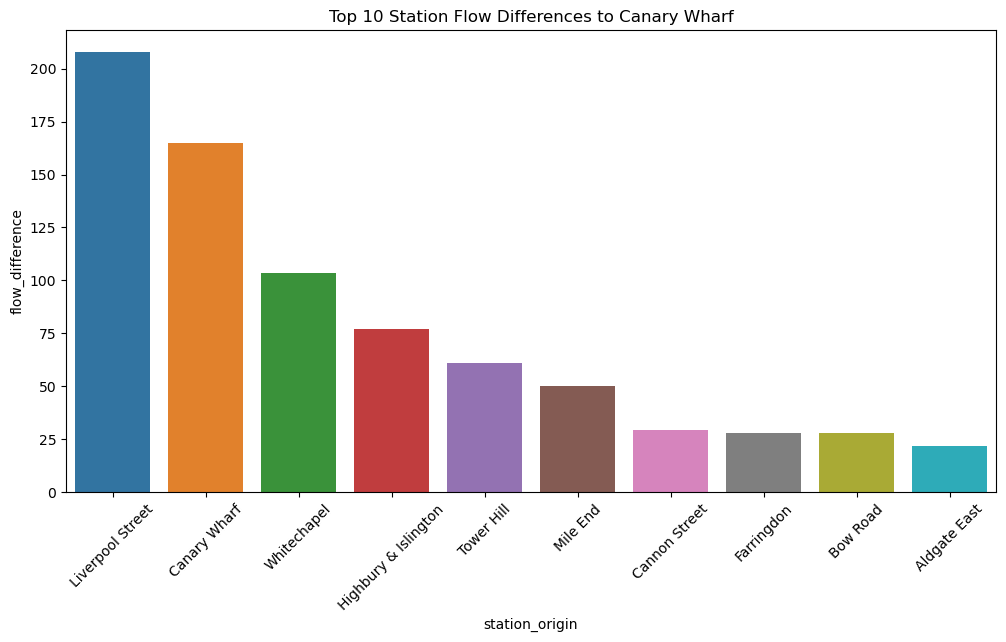

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Difference plot for Canary Wharf
canary_wharf_difference = london_flows[london_flows['station_destination'] == 'Canary Wharf'].copy()
canary_wharf_difference['flow_difference'] = canary_wharf_difference['adjusted_new_flows'] - canary_wharf_difference['flows']

plt.figure(figsize=(12, 6))
sns.barplot(x='station_origin', y='flow_difference', data=canary_wharf_difference.sort_values(by='flow_difference', ascending=False).head(10))
plt.title('Top 10 Station Flow Differences to Canary Wharf')
plt.xticks(rotation=45)
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load the data
london_flows = pd.read_csv('london_flows.csv')

# Define the model parameters
alpha = 1  # assuming for the purpose of this exercise
k = 1.212e-6
beta_original = 6.957e-5

# Define the two new beta values for Scenario B
beta_1 = 2 * beta_original
beta_2 = 3 * beta_original

# Recompute flows for beta_1
london_flows['new_flows_beta_1'] = k * (london_flows['population']**alpha) * (london_flows['jobs']**beta) * \
                                  np.exp(-beta_1 * london_flows['distance'])

# Recompute flows for beta_2
london_flows['new_flows_beta_2'] = k * (london_flows['population']**alpha) * (london_flows['jobs']**beta) * \
                                  np.exp(-beta_2 * london_flows['distance'])

# Display the results
print(london_flows[['station_origin', 'station_destination', 'flows', 'new_flows_beta_1', 'new_flows_beta_2']].head())


  station_origin station_destination  flows  new_flows_beta_1  \
0     Abbey Road   Bank and Monument      0          0.000234   
1     Abbey Road             Beckton      1          0.000222   
2     Abbey Road           Blackwall      3          0.000430   
3     Abbey Road        Canary Wharf      1          0.000358   
4     Abbey Road        Canning Town     37          0.000533   

   new_flows_beta_2  
0          0.000133  
1          0.000123  
2          0.000330  
3          0.000251  
4          0.000456  
